In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
data['trans_date'] = pd.to_datetime(data['trans_date'], errors='coerce')


In [22]:
data['Month'] = data['trans_date'].dt.month
data['Year'] = data['trans_date'].dt.year

In [20]:
print(data[['trans_date', 'Month', 'Year']].head(15))


   trans_date  Month  Year
0  2013-02-11      2  2013
1  2015-03-15      3  2015
2  2013-02-26      2  2013
3  2011-11-16     11  2011
4  2013-11-20     11  2013
5  2014-03-26      3  2014
6  2012-02-06      2  2012
7  2015-01-30      1  2015
8  2013-01-08      1  2013
9  2013-08-20      8  2013
10 2013-07-02      7  2013
11 2013-03-25      3  2013
12 2012-11-03     11  2012
13 2013-05-12      5  2013
14 2014-12-29     12  2014


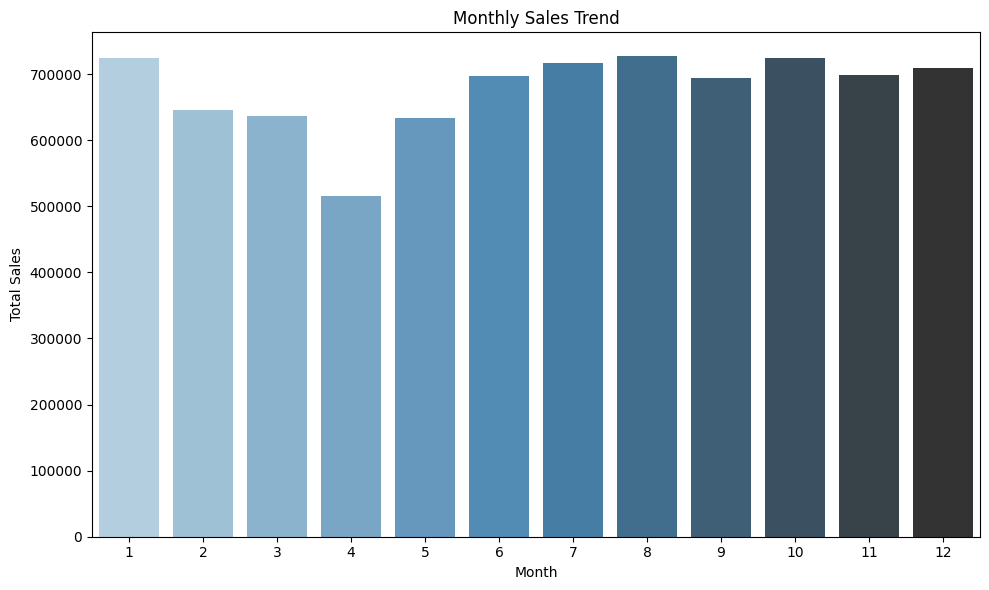

In [24]:
monthly_sales = data.groupby('Month')['tran_amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='tran_amount', hue='Month', data=monthly_sales, palette='Blues_d', legend=False)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('Report/Monthly_Sales_Trend.png')
plt.show()


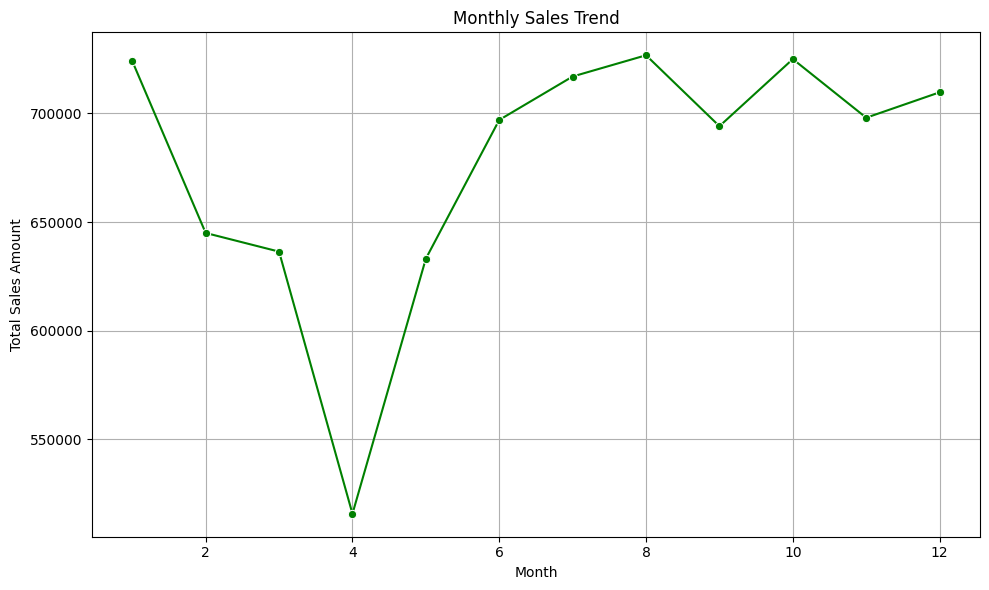

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart - Monthly Sales Trend
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='tran_amount', data=monthly_sales, marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.savefig('Report/LineChart_Monthly_Sales.png')
plt.show()


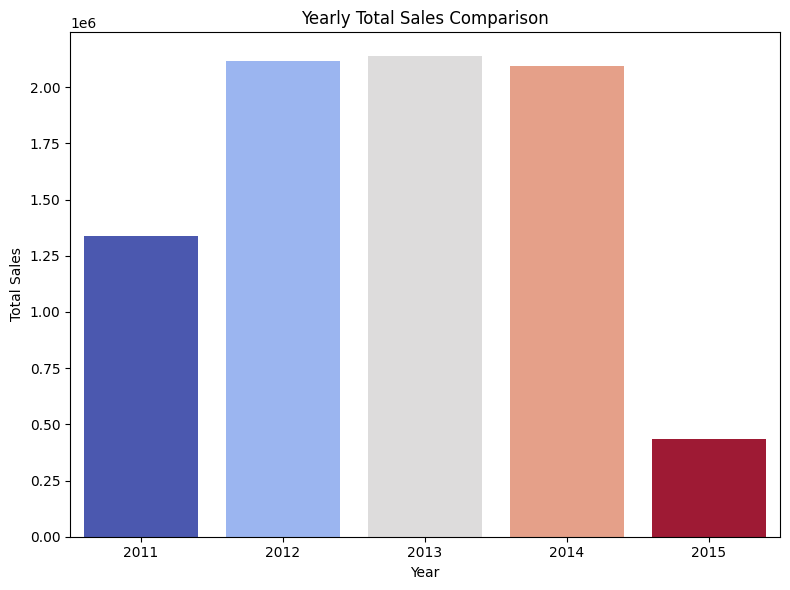

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='Year', y='tran_amount', hue='Year', data=yearly_sales, palette='coolwarm', legend=False)
plt.title('Yearly Total Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('Report/BarChart_Yearly_Sales.png')
plt.show()


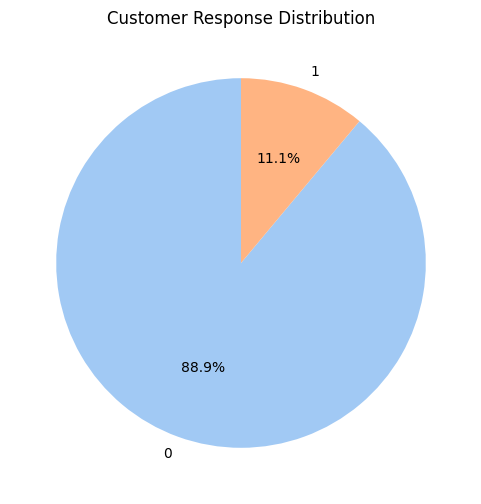

In [30]:
response_counts = data['response'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Response Distribution')
plt.savefig('Report/PieChart_Response.png')
plt.show()


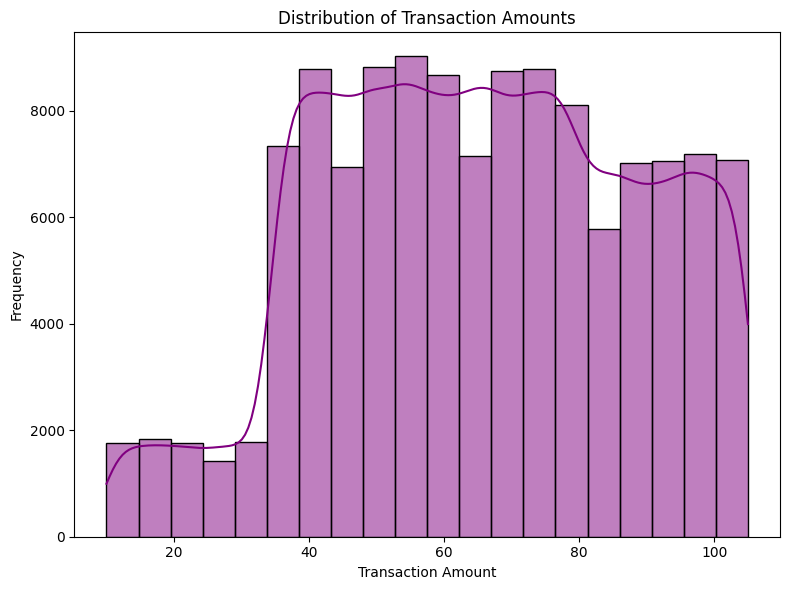

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(data['tran_amount'], bins=20, kde=True, color='purple')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Report/Histogram_Transactions.png')
plt.show()


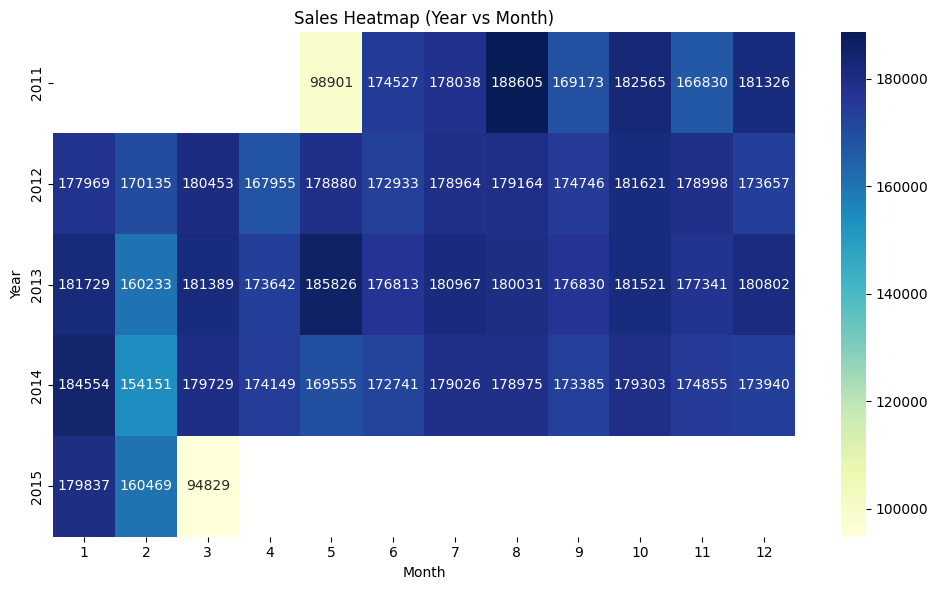

In [32]:
heatmap_data = data.pivot_table(values='tran_amount', index='Year', columns='Month', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales Heatmap (Year vs Month)')
plt.tight_layout()
plt.savefig('Report/Heatmap_Sales.png')
plt.show()


In [33]:
import pandas as pd
from openpyxl import Workbook, load_workbook
from openpyxl.chart import BarChart, LineChart, PieChart, Reference
from openpyxl.utils.dataframe import dataframe_to_rows

# Load cleaned data
data = pd.read_csv('Cleaned_Retail_Data.csv')
data['trans_date'] = pd.to_datetime(data['trans_date'], errors='coerce')
data['Month'] = data['trans_date'].dt.month
data['Year'] = data['trans_date'].dt.year

# 1️⃣ Monthly Sales Summary
monthly_sales = data.groupby('Month')['tran_amount'].sum().reset_index()

# 2️⃣ Yearly Sales Summary
yearly_sales = data.groupby('Year')['tran_amount'].sum().reset_index()

# 3️⃣ Response Summary (if available)
if 'response' in data.columns:
    response_summary = data['response'].value_counts().reset_index()
    response_summary.columns = ['Response_Type', 'Count']
else:
    response_summary = pd.DataFrame({'Response_Type': [], 'Count': []})

# Create a new workbook
wb = Workbook()

# -----------------------------
# 📈 SHEET 1 — Monthly Sales
# -----------------------------
ws1 = wb.active
ws1.title = "Monthly_Sales"
for r in dataframe_to_rows(monthly_sales, index=False, header=True):
    ws1.append(r)

# Add a line chart
line_chart = LineChart()
line_chart.title = "Monthly Sales Trend"
line_chart.y_axis.title = "Sales Amount"
line_chart.x_axis.title = "Month"

data_ref = Reference(ws1, min_col=2, min_row=1, max_row=len(monthly_sales) + 1)
cats_ref = Reference(ws1, min_col=1, min_row=2, max_row=len(monthly_sales) + 1)
line_chart.add_data(data_ref, titles_from_data=True)
line_chart.set_categories(cats_ref)
ws1.add_chart(line_chart, "E5")

# -----------------------------
# 📊 SHEET 2 — Yearly Sales
# -----------------------------
ws2 = wb.create_sheet("Yearly_Sales")
for r in dataframe_to_rows(yearly_sales, index=False, header=True):
    ws2.append(r)

bar_chart = BarChart()
bar_chart.title = "Yearly Sales Overview"
bar_chart.y_axis.title = "Total Sales"
bar_chart.x_axis.title = "Year"

data_ref = Reference(ws2, min_col=2, min_row=1, max_row=len(yearly_sales) + 1)
cats_ref = Reference(ws2, min_col=1, min_row=2, max_row=len(yearly_sales) + 1)
bar_chart.add_data(data_ref, titles_from_data=True)
bar_chart.set_categories(cats_ref)
ws2.add_chart(bar_chart, "E5")

# -----------------------------
# 🥧 SHEET 3 — Response Summary
# -----------------------------
ws3 = wb.create_sheet("Customer_Response")
for r in dataframe_to_rows(response_summary, index=False, header=True):
    ws3.append(r)

if not response_summary.empty:
    pie_chart = PieChart()
    pie_chart.title = "Customer Response Distribution"

    data_ref = Reference(ws3, min_col=2, min_row=1, max_row=len(response_summary) + 1)
    cats_ref = Reference(ws3, min_col=1, min_row=2, max_row=len(response_summary) + 1)
    pie_chart.add_data(data_ref, titles_from_data=True)
    pie_chart.set_categories(cats_ref)
    ws3.add_chart(pie_chart, "E5")

# Save the dashboard
wb.save("Report/Dashboard.xlsx")

print("✅ Dashboard.xlsx created successfully with charts!")


✅ Dashboard.xlsx created successfully with charts!
